In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


#Data Preprocessing:

In [ ]:
salary_data = pd.read_csv("Salary_Data.csv")
print(salary_data)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [ ]:
print(salary_data.shape)

(30, 2)


In [ ]:
print(salary_data.info)

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>


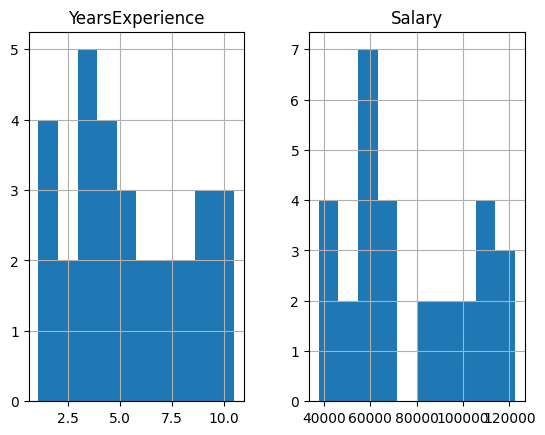

In [ ]:
salary_data.hist()
plt.show()

In [ ]:
salary_data.isnull()
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
X = salary_data.iloc[:,0:1].values
Y = salary_data.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
from sklearn.impute import SimpleImputer #claeIss
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean',copy=True)
imputer = imputer.fit(X[:, 0:1])
X[:, 0:1]= imputer.transform(X[:, 0:1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 20)

In [ ]:
print(X_train)

[[ 7.1]
 [ 2.9]
 [ 9. ]
 [ 6. ]
 [ 4.5]
 [ 5.3]
 [ 3. ]
 [ 5.1]
 [ 3.2]
 [ 1.1]
 [ 1.5]
 [ 3.2]
 [ 7.9]
 [ 4. ]
 [ 6.8]
 [ 3.7]
 [10.3]
 [ 4.9]
 [ 9.5]
 [ 2. ]]


In [ ]:
print(X_test)

[[ 4.1]
 [ 2.2]
 [ 1.3]
 [ 3.9]
 [10.5]
 [ 4. ]
 [ 5.9]
 [ 9.6]
 [ 8.7]
 [ 8.2]]


In [ ]:
print(y_train)

[ 98273.  56642. 105582.  93940.  61111.  83088.  60150.  66029.  64445.
  39343.  37731.  54445. 101302.  55794.  91738.  57189. 122391.  67938.
 116969.  43525.]


In [ ]:
print(y_test)

[ 57081.  39891.  46205.  63218. 121872.  56957.  81363. 112635. 109431.
 113812.]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 64941.69086556  47062.57259669  38593.51657459  63059.67841621
 125166.08924494  64000.68464088  81879.80290976 116697.03322284
 108227.97720074 103522.94607735]


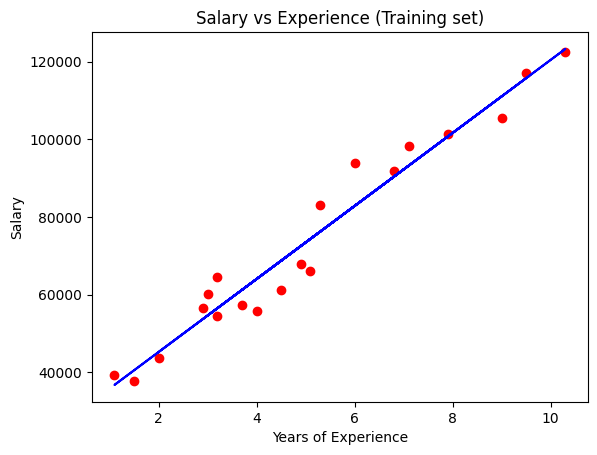

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
#we can see the real values observations in red dots and predicted values are covered by the blue regression line.
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

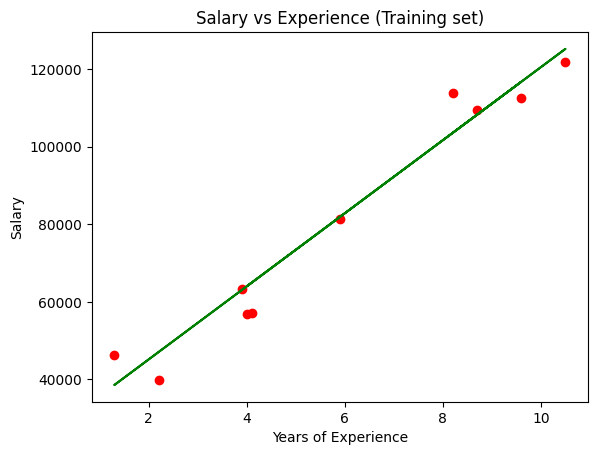

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'green')
#we can see the real values observations in red dots and predicted values are covered by the blue regression line.
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
print('Train Score: %f' %(regressor.score(X_train, y_train)))
print('Test Score: %f' % (regressor.score(X_test, y_test)) )


Train Score: 0.953472
Test Score: 0.960110


In [ ]:
from sklearn import metrics
print("MAE %2.f" %(metrics.mean_absolute_error(y_test,y_pred)))

MAE 4921


In [ ]:
YearsExperience= 100000000

print("Salary for given Years of Experience is :     %.2f"    %(regressor.predict([[YearsExperience]])))

NameError: name 'regressor' is not defined

In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(regressor)

# Load the pickled model
saved_model = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
saved_model.predict(X_test)